# Ocean Color from ESA

https://esa-oceancolour-cci.org/

daily data:
https://rsg.pml.ac.uk/thredds/dodsC/CCI_ALL-v4.1-DAILY

In [2]:
import xarray as xr
import datetime
import matplotlib.pyplot as plt
import pandas as pd

import matplotlib.colors as colors

import cartopy 
import cartopy.crs as ccrs

# import netcdf4
%matplotlib inline

/Users/beaird/anaconda3/lib/python3.7/site-packages/xarray/core/merge.py:17: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


# load and slice a small region

In [26]:
url = 'https://rsg.pml.ac.uk/thredds/dodsC/CCI_ALL-v4.1-DAILY'

data = xr.open_dataset(url).sel(lat=slice(72,70), lon=slice(-168,-150), time=slice('07-28-2017', '08-20-2017'))

print(data.nbytes/10**6)
data

181.151904


<xarray.Dataset>
Dimensions:             (lat: 48, lon: 432, time: 24)
Coordinates:
  * lat                 (lat) float32 71.979164 71.9375 ... 70.0625 70.020836
  * lon                 (lon) float32 -167.97917 -167.9375 ... -150.02083
  * time                (time) datetime64[ns] 2017-07-28 ... 2017-08-20
Data variables:
    crs                 (time) int32 ...
    MODISA_nobs         (time, lat, lon) float32 ...
    VIIRS_nobs          (time, lat, lon) float32 ...
    MERIS_nobs          (time, lat, lon) float32 ...
    SeaWiFS_nobs        (time, lat, lon) float32 ...
    total_nobs          (time, lat, lon) float32 ...
    Rrs_412             (time, lat, lon) float32 ...
    Rrs_443             (time, lat, lon) float32 ...
    Rrs_490             (time, lat, lon) float32 ...
    Rrs_510             (time, lat, lon) float32 ...
    Rrs_555             (time, lat, lon) float32 ...
    Rrs_670             (time, lat, lon) float32 ...
    water_class1        (time, lat, lon) float32 ...

# how much data is there in your region?

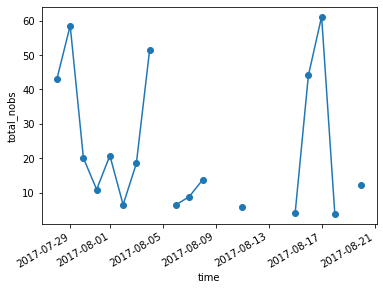

In [32]:
data.total_nobs.mean(dim=('lat','lon')).plot(marker='o')

# What are the details of the chl data?

In [28]:
data.chlor_a

<xarray.DataArray 'chlor_a' (time: 24, lat: 48, lon: 432)>
[497664 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 71.979164 71.9375 71.895836 ... 70.0625 70.020836
  * lon      (lon) float32 -167.97917 -167.9375 ... -150.0625 -150.02083
  * time     (time) datetime64[ns] 2017-07-28 2017-07-29 ... 2017-08-20
Attributes:
    long_name:            Chlorophyll-a concentration in seawater (not log-tr...
    units:                milligram m-3
    ancillary_variables:  chlor_a_log10_rmsd chlor_a_log10_bias
    grid_mapping:         crs
    parameter_vocab_uri:  http://vocab.ndg.nerc.ac.uk/term/P011/current/CHLTVOLU
    standard_name:        mass_concentration_of_chlorophyll_a_in_sea_water
    units_nonstandard:    mg m^-3
    _ChunkSizes:          [  1 270 270]

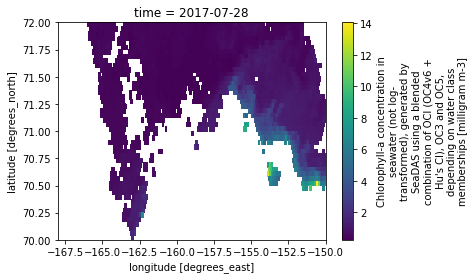

In [29]:
data.chlor_a.sel(time='2017-07-28').plot()

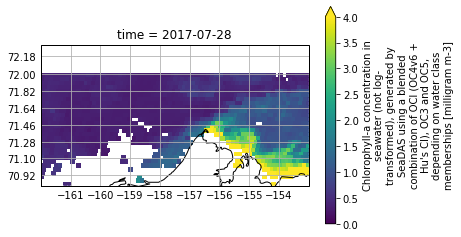

In [30]:
ax = plt.axes(projection=ccrs.Mercator())

data.chlor_a.sel(time='2017-07-28').plot( vmin=0, vmax=4,transform=ccrs.PlateCarree())

ax.coastlines('10m')
gl = ax.gridlines(draw_labels=True, )
gl.xlabels_top = False
gl.ylabels_right = False
ax.set_extent([-162, -153, 70.8, 72.3])

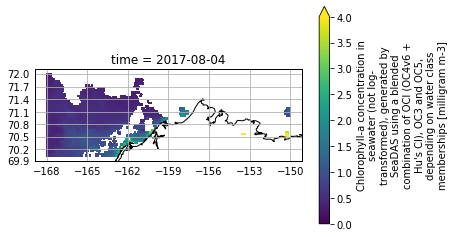

In [38]:
ax = plt.axes(projection=ccrs.Mercator())

data.chlor_a.sel(time='2017-08-16').plot( vmin=0, vmax=4,transform=ccrs.PlateCarree())

ax.coastlines('10m')
gl = ax.gridlines(draw_labels=True, )
gl.xlabels_top = False
gl.ylabels_right = False
# ax.set_extent([-162, -153, 70.8, 72.3])

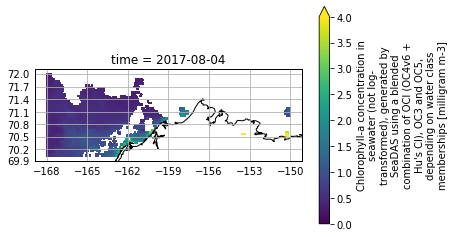

In [39]:
ax = plt.axes(projection=ccrs.Mercator())

data.chlor_a.sel(time='2017-08-04').plot( vmin=0, vmax=4,transform=ccrs.PlateCarree())

ax.coastlines('10m')
gl = ax.gridlines(draw_labels=True, )
gl.xlabels_top = False
gl.ylabels_right = False